In [1]:
import numpy as np

In [2]:
def read_cloud_csv(file):
    # Leer todo el archivo y dividirlo según la solicitud
    data = np.loadtxt(file, delimiter=',', skiprows=1)

    # Separar la primera línea de los datos
    # Dado que la primera línea son solo encabezados, ajustamos el enfoque:
    # La solicitud original parece haberse malinterpretado debido a los encabezados. 
    # Si se desea incluir realmente la primera línea de datos en un array separado, procederemos de esa manera.
    first_row_data = data[0, :]  # Primer renglón de datos
    rest_data = data[1:, :]  # Resto de los datos

    ##if(file == 'Nubes/mundo_26_1/intersection_points_167.csv'):
    ##    print(first_row_data)
    ##if(file =='Nubes/mundo_18/intersection_points_21.csv'):
    ##    print(first_row_data)

    #first_row_data, rest_data[:5]  # Mostramos la primera fila de datos y las primeras 5 del resto para verificar

    return first_row_data[::-1], rest_data

In [3]:
import os

#
Posiciones_robot = []
Nubes = []


# Define la dirección (ruta) en la que deseas buscar los directorios
ruta = 'Nubes'

Elementos_en_orden = []
for i in range(82):
    caso1= "mundo_"+str(i)
    Elementos_en_orden.append(caso1)
    caso2= "mundo_"+str(i)+"_1"
    Elementos_en_orden.append(caso2)

#print(Elementos_en_orden[:5])
#print(Elementos_en_orden[-1])

# Lista todos los archivos y directorios en la ruta especificada
todos_los_elementos = os.listdir(ruta)

# Filtra solo los directorios
solo_directorios = [elemento for elemento in todos_los_elementos if os.path.isdir(os.path.join(ruta, elemento))]

#print(solo_directorios[:5])

Directorios_nubes = []
for n in Elementos_en_orden:
    if n in solo_directorios:
        Directorios_nubes.append(n)


#print("Analizando ",len(solo_directorios))
inicio = 0
for directorio in Directorios_nubes:
    ruta_directorio = ruta+"/"+directorio
    print(ruta_directorio, "inicio:", inicio)
    #Lista todos los archivos y directorios en la ruta especificada
    len_nombres_nubes = len(os.listdir(ruta_directorio))
    nombres_nubes = []
    for i in range(len_nombres_nubes):
        nombres_nubes.append("intersection_points_"+str(i)+".csv")
    rand_index = [i for i in np.random.randint(0, len_nombres_nubes, 80)]
    #print(rand_index)
    nombres_nubes= [nombres_nubes[i] for i in rand_index]
    #print(nombres_nubes)
    for nube in nombres_nubes:
        ruta_nubes = ruta_directorio +"/"+nube
        #if(ruta_directorio == 'Nubes/mundo_18'):
        #    print(ruta_nubes)
        #    pass
        a,b = read_cloud_csv(ruta_nubes)
        if(np.any(np.isinf(b)) == False):
            Posiciones_robot.append(a)
            Nubes.append(b)
            inicio +=1
    

Posiciones_robot= np.array(Posiciones_robot)

Nubes/mundo_0 inicio: 0
Nubes/mundo_1 inicio: 65
Nubes/mundo_2 inicio: 126
Nubes/mundo_2_1 inicio: 193
Nubes/mundo_3 inicio: 193
Nubes/mundo_3_1 inicio: 257
Nubes/mundo_4 inicio: 257
Nubes/mundo_4_1 inicio: 337
Nubes/mundo_5 inicio: 337
Nubes/mundo_5_1 inicio: 417
Nubes/mundo_6 inicio: 417
Nubes/mundo_7 inicio: 417
Nubes/mundo_8 inicio: 417
Nubes/mundo_9 inicio: 417
Nubes/mundo_10 inicio: 417
Nubes/mundo_11 inicio: 417
Nubes/mundo_12 inicio: 417
Nubes/mundo_13 inicio: 417
Nubes/mundo_13_1 inicio: 479
Nubes/mundo_14 inicio: 479
Nubes/mundo_14_1 inicio: 532
Nubes/mundo_15 inicio: 532
Nubes/mundo_15_1 inicio: 589
Nubes/mundo_16 inicio: 589
Nubes/mundo_16_1 inicio: 641
Nubes/mundo_17 inicio: 641
Nubes/mundo_17_1 inicio: 685
Nubes/mundo_18 inicio: 685
Nubes/mundo_18_1 inicio: 723
Nubes/mundo_19 inicio: 723
Nubes/mundo_19_1 inicio: 754
Nubes/mundo_20 inicio: 754
Nubes/mundo_20_1 inicio: 786
Nubes/mundo_21 inicio: 786
Nubes/mundo_21_1 inicio: 819
Nubes/mundo_22 inicio: 819
Nubes/mundo_22_1 in

Se eliminaron los últimos archivos de las carpetas 27_1 y 23

In [4]:
len(Posiciones_robot)

3612

In [5]:
len(Nubes[0])

640

In [6]:
len(Nubes)

3612

# Medidas de Similitud

In [7]:
def mean_squared_error(nube1, nube2):
    return np.sum( (nube1[:,0] - nube2[:,0]) ** 2 + (nube1[:,1] - nube2[:,1]) ** 2) / len(nube1)

# Aplicando Similitud

In [8]:
mean_squared_error(Nubes[0],Nubes[100])

0.6841867580696958

In [9]:
def get_good_and_bad_samples(Nubes_Similitud, k, n):

    Good_Samples = []
    Bad_Samples = []


    for i in range(len(Nubes_Similitud)):
        if(i%100 == 0):
            print(i,"/",len(Nubes_Similitud))
        #Valores ordenados de menor a mayor
        sort_index = np.argsort(Nubes_Similitud[i])
        #sort_values = np.sort(Nubes_Similitud[i])

        #print([[i,j] for i,j in zip(np.ones(k, dtype=int)*i,sort_index[:k])])

        for nn in range(n):
            Good_Samples.append([i,sort_index[nn]])
            #mid_point = int(len(Nubes_Similitud)/2)
            Bad_Samples.append([[i,j] for i,j in zip(np.ones(k, dtype=int)*i,(sort_index[::-1])[k*nn:k*(nn+1)])])
            #print("[",mid_point+k*nn,",",mid_point+k*(nn+1),"]")

    return Good_Samples, Bad_Samples


In [10]:
Nubes_Similitud = np.zeros((len(Nubes),len(Nubes)))

max_value = 0

for i in range(len(Nubes)):
    if(i%100 == 0):
            print(i,"/",len(Nubes_Similitud))
    for j in range(len(Nubes)):
        Nubes_Similitud[i][j] = mean_squared_error(Nubes[i], Nubes[j])
    max_value = max(np.max(Nubes_Similitud[i]), max_value)

print(max_value)

0 / 3612


100 / 3612
200 / 3612
300 / 3612
400 / 3612
500 / 3612
600 / 3612
700 / 3612
800 / 3612
900 / 3612
1000 / 3612
1100 / 3612
1200 / 3612
1300 / 3612
1400 / 3612
1500 / 3612
1600 / 3612
1700 / 3612
1800 / 3612
1900 / 3612
2000 / 3612
2100 / 3612
2200 / 3612
2300 / 3612
2400 / 3612
2500 / 3612
2600 / 3612
2700 / 3612
2800 / 3612
2900 / 3612
3000 / 3612
3100 / 3612
3200 / 3612
3300 / 3612
3400 / 3612
3500 / 3612
3600 / 3612
33.68148649280713


In [11]:
sort_index = np.argsort(Nubes_Similitud[1])
sort_values = np.sort(Nubes_Similitud[1])

In [12]:
print(sort_index[:10])
print(sort_values[:10])

[ 1 41 32 63 48 57  0 38 26 47]
[0.         0.00660392 0.00660392 0.01293842 0.01389332 0.01423889
 0.05115872 0.06329665 0.07579699 0.10427908]


In [13]:
K = 15

In [14]:
Good_Samples, Bad_Samples = get_good_and_bad_samples(Nubes_Similitud, K,200)

0 / 3612


100 / 3612
200 / 3612
300 / 3612
400 / 3612
500 / 3612
600 / 3612
700 / 3612
800 / 3612
900 / 3612
1000 / 3612
1100 / 3612
1200 / 3612
1300 / 3612
1400 / 3612
1500 / 3612
1600 / 3612
1700 / 3612
1800 / 3612
1900 / 3612
2000 / 3612
2100 / 3612
2200 / 3612
2300 / 3612
2400 / 3612
2500 / 3612
2600 / 3612
2700 / 3612
2800 / 3612
2900 / 3612
3000 / 3612
3100 / 3612
3200 / 3612
3300 / 3612
3400 / 3612
3500 / 3612
3600 / 3612


In [15]:
print(len(Good_Samples[0]))
print(len(Bad_Samples[0]))

2
15


In [16]:
print(Good_Samples[0:200])
print(Bad_Samples[0])

[[0, 0], [0, 38], [0, 57], [0, 63], [0, 22], [0, 47], [0, 52], [0, 1], [0, 53], [0, 41], [0, 32], [0, 48], [0, 66], [0, 111], [0, 91], [0, 70], [0, 115], [0, 45], [0, 75], [0, 74], [0, 90], [0, 26], [0, 112], [0, 96], [0, 116], [0, 76], [0, 108], [0, 11], [0, 59], [0, 85], [0, 86], [0, 94], [0, 114], [0, 60], [0, 31], [0, 33], [0, 36], [0, 106], [0, 23], [0, 46], [0, 9], [0, 82], [0, 118], [0, 113], [0, 110], [0, 171], [0, 184], [0, 155], [0, 187], [0, 175], [0, 160], [0, 163], [0, 89], [0, 158], [0, 130], [0, 120], [0, 146], [0, 54], [0, 126], [0, 182], [0, 164], [0, 4], [0, 124], [0, 172], [0, 142], [0, 143], [0, 159], [0, 189], [0, 134], [0, 180], [0, 161], [0, 40], [0, 3], [0, 58], [0, 21], [0, 27], [0, 10], [0, 20], [0, 105], [0, 119], [0, 117], [0, 127], [0, 109], [0, 137], [0, 107], [0, 169], [0, 15], [0, 152], [0, 2], [0, 88], [0, 138], [0, 185], [0, 136], [0, 141], [0, 24], [0, 100], [0, 39], [0, 133], [0, 206], [0, 214], [0, 148], [0, 229], [0, 219], [0, 239], [0, 209], [0, 5

In [17]:
from sklearn.model_selection import train_test_split

Good_Samples_train,Good_Samples_val,Bad_Samples_train,Bad_Samples_val   = train_test_split(Good_Samples, Bad_Samples, test_size=0.2)

print("GS_Train size:", len(Good_Samples_train))
print("GS_Val   size:", len(Good_Samples_val))
print("BS_Train size:", len(Bad_Samples_train))
print("BS_Val   size:", len(Bad_Samples_val))

GS_Train size: 577920
GS_Val   size: 144480
BS_Train size: 577920
BS_Val   size: 144480


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

class SGNSModel(nn.Module):
    def __init__(self, num_clouds, embedding_dim, K):
        super(SGNSModel, self).__init__()
        # Embedding para las nubes
        self.word_embeddings = nn.Embedding(num_clouds, embedding_dim)
        # Embedding para los contextos 
        self.context_embeddings = nn.Embedding(num_clouds, embedding_dim)
        # Capa de regresión logística
        self.logistic_regression = nn.Linear(embedding_dim, 1+K)
        # Función de activación sigmoide
        self.activation = nn.Sigmoid()
        
    def forward(self, cloud_indices, context_indices, labels):
        # Obtener embeddings
        cloud_embeds = self.word_embeddings(cloud_indices)
        context_embeds = self.context_embeddings(context_indices)
        #print(len(cloud_embeds))
        #print(len(context_embeds))
        # Producto punto entre la nube y el contexto
        dot_product = (cloud_embeds * context_embeds).sum(1)
        #len(dot_product)
        # Pasar el producto punto a través de la regresión logística y luego a través de la sigmoide
        predictions = self.activation(self.logistic_regression(dot_product.unsqueeze(1)))
        return predictions
    
def model_eval(data, model, criterion):
    with torch.no_grad():
        preds, tgts = [], []
        total_loss = 0
        epoch_loss = []
        for cloud_indices, context_indices, labels in data:

            #Obtener predicción
            predictions = model(cloud_indices, context_indices, labels)
            #predictions = predictions.numpy()

            tgt = labels.numpy()
            tgts.append(tgt)
            preds.append(predictions.squeeze())

            #print(tgt)
            #print(predictions.squeeze().numpy())
            loss = criterion(predictions.squeeze(), labels)
            #print(predictions.squeeze(), labels)
            total_loss= loss.item()
            epoch_loss.append(loss.item())
            

    tgts = [e for l in tgts for e in l]
    preds = [e for l in preds for e in l]

    return np.mean(epoch_loss)

In [19]:
def train_model(model, train_loader, val_loader, epochs=10, learning_rate=0.001):
    
    #optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    #criterion = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        loss_epoch = []

        for cloud_indices, context_indices, labels in train_loader:
            
            # Forward pass
            predictions = model(cloud_indices, context_indices, labels)
            loss = criterion(predictions.squeeze(), labels)
            total_loss += loss.item()
            loss_epoch.append(loss.item())
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        
        #Metricas del conjunto de validación
        model.eval()
        tuning_metric = model_eval(val_loader, model, criterion)
        total_loss = np.mean(loss_epoch)


        print(f'Epoch {epoch}, Loss: {total_loss}, Val loss: {tuning_metric}')

In [20]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 32
num_workers = 2

#Entrenamiento
train_dataset = TensorDataset(torch.tensor([ [pos_pairs[0]]+ [p[0] for p in neg_pairs] for pos_pairs, neg_pairs in zip(Good_Samples_train, Bad_Samples_train) ],dtype=torch.long), #Cloud
                              torch.tensor([ [pos_pairs[1]]+ [p[1] for p in neg_pairs] for pos_pairs, neg_pairs in zip(Good_Samples_train, Bad_Samples_train) ],dtype=torch.long), #Context
                              torch.tensor([[1] + [0]*(len(neg_pairs)) for pos_pairs, neg_pairs in zip(Good_Samples_train, Bad_Samples_train)] , dtype=torch.float ))

train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          num_workers=num_workers,
                          shuffle=True)

#Validacion
val_dataset = TensorDataset(torch.tensor([ [pos_pairs[0]]+ [p[0] for p in neg_pairs] for pos_pairs, neg_pairs in zip(Good_Samples_val, Bad_Samples_val) ],dtype=torch.long), #Cloud
                              torch.tensor([ [pos_pairs[1]]+ [p[1] for p in neg_pairs] for pos_pairs, neg_pairs in zip(Good_Samples_val, Bad_Samples_val) ],dtype=torch.long), #Context
                              torch.tensor([[1]+ [0]*(len(neg_pairs)) for pos_pairs, neg_pairs in zip(Good_Samples_val, Bad_Samples_val)] , dtype=torch.float ))

val_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          num_workers=num_workers,
                          shuffle=False)


In [21]:
batch = next(iter(train_loader))
print(f'GS shape: {batch[0].shape}')
print(f'BS shape: {batch[1].shape}')
print(f'Label shape: {batch[2].shape}')

GS shape: torch.Size([32, 16])
BS shape: torch.Size([32, 16])
Label shape: torch.Size([32, 16])


In [22]:
len(Good_Samples)

722400

In [23]:
num_clouds = len(Nubes)
embedding_dim = 50

# Inicializar modelo
model = SGNSModel(num_clouds, embedding_dim, K)

#print(model.word_embeddings(torch.tensor(0, dtype=torch.long)))
# Entrenar el modelo
train_model(model, train_loader, val_loader, epochs=100, learning_rate=0.0001)
#print(model.word_embeddings(torch.tensor(0, dtype=torch.long)))

Epoch 0, Loss: 2.791197028931061, Val loss: 2.7706630194834037
Epoch 1, Loss: 2.7422569235165914, Val loss: 2.7067372621623913


KeyboardInterrupt: 

In [ ]:
model_eval(val_loader, model, nn.BCELoss())

0.9010021835977885

In [ ]:
def print_closest_clouds(model, cloud):
    cloud_emb = model.word_embeddings(torch.tensor(cloud, dtype=torch.long))
    dists = torch.norm(model.word_embeddings.weight - cloud_emb, dim=1 ).detach()
    #print(dists)
    lst = sorted(enumerate(dists.numpy()), key=lambda x: x[1])
    print(lst)
    for idx, difference in lst[1:10+1]:
        print("idx:", idx, "dif:", difference)

    return lst[1:10+1]

In [ ]:
lst = print_closest_clouds(model, 1)

[(1, 0.0), (703, 7.0829234), (546, 7.414237), (1920, 7.436479), (743, 7.4612637), (1631, 7.5890546), (77, 7.606358), (959, 7.6510687), (301, 7.7678175), (2570, 7.7733827), (998, 7.8263083), (2312, 7.826765), (2254, 7.865558), (2996, 7.8983374), (3151, 7.9111576), (3185, 7.9424863), (3118, 7.944272), (837, 7.9668913), (64, 7.992539), (2567, 8.021534), (3287, 8.077697), (2939, 8.096482), (3052, 8.104875), (1298, 8.143309), (1143, 8.158969), (1483, 8.172576), (803, 8.195781), (1564, 8.201587), (1256, 8.204476), (2099, 8.211643), (1779, 8.267351), (2944, 8.275453), (1703, 8.27761), (2441, 8.27937), (3605, 8.283614), (1932, 8.283923), (736, 8.2879095), (745, 8.290983), (1508, 8.306344), (1705, 8.306842), (1296, 8.309659), (1930, 8.324193), (2170, 8.329973), (1277, 8.345503), (479, 8.347055), (2427, 8.3497305), (3484, 8.36144), (448, 8.370953), (1719, 8.377271), (1879, 8.387008), (887, 8.388208), (2005, 8.402353), (7, 8.40872), (2087, 8.42561), (2810, 8.4281645), (1914, 8.435479), (2279, 8.4

In [ ]:
print(Good_Samples[2])
print(Bad_Samples[2])


[0, 57]
[[0, 3271], [0, 3091], [0, 3140], [0, 3267], [0, 1747], [0, 2469], [0, 3255], [0, 2608], [0, 3082], [0, 1522], [0, 1702], [0, 3269], [0, 3262], [0, 2484], [0, 3283]]


[[-1.12564743e+00 -7.06718552e-07]
 [-1.12566870e+00 -1.10695821e-02]
 [-1.12564977e+00 -2.21402261e-02]
 ...
 [-1.12561473e+00  2.21397822e-02]
 [-1.12564783e+00  1.10696223e-02]
 [-1.12564039e+00  9.52024364e-07]]
-1.369377007509068   -10.000002703726143
-1.5442138088907436   -9.750002570804785


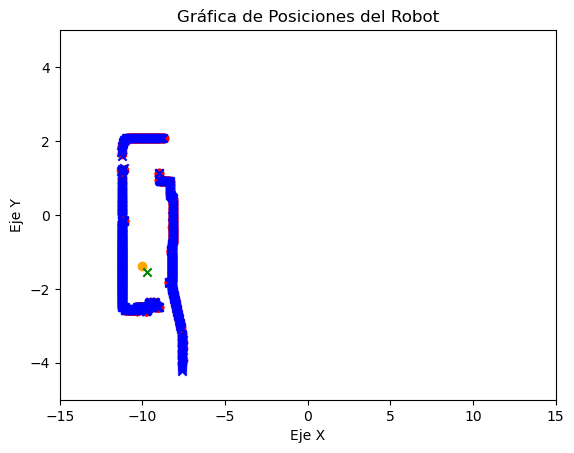

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_nube = 0
num_nube_next = 77

print(Nubes[num_nube])

# Dividir el arreglo de coordenadas en dos arreglos x e y
x1 = [cord[0]+Posiciones_robot[num_nube][0] for cord in Nubes[num_nube]]
y1 = [-cord[1]+Posiciones_robot[num_nube][1] for cord in Nubes[num_nube]]

#x1.append(Posiciones_robot[num_nube][0])
#y1.append(Posiciones_robot[num_nube][1])

print(Posiciones_robot[num_nube][0] ," ", Posiciones_robot[num_nube][1])

x2 = [cord[0]+Posiciones_robot[num_nube_next][0] for cord in Nubes[num_nube_next]]
y2 = [-cord[1]+Posiciones_robot[num_nube_next][1] for cord in Nubes[num_nube_next]]

#x2.append(Posiciones_robot[num_nube_next][0])
#y2.append(Posiciones_robot[num_nube_next][1])

print(Posiciones_robot[num_nube_next][0] ," ", Posiciones_robot[num_nube_next][1])

# Crear la figura y el eje para la gráfica
fig, ax = plt.subplots()

# Graficar los puntos
ax.scatter(y1, x1, color='red', marker='o', label='Conjunto 1')
ax.scatter(y2, x2, color='blue', marker='x',  label='Conjunto 2')
ax.scatter(Posiciones_robot[num_nube][1], Posiciones_robot[num_nube][0], color='orange', marker='o', label='Conjunto 1')
ax.scatter(Posiciones_robot[num_nube_next][1], Posiciones_robot[num_nube_next][0], color='green', marker='x',  label='Conjunto 2')


# Opcional: establecer títulos para los ejes y la gráfica
ax.set_title('Gráfica de Posiciones del Robot')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_ylim(-5,5)
ax.set_xlim(-15,15)


# Mostrar la gráfica
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

np.random.seed(42) # Para reproducibilidad
X =  model.word_embeddings(torch.tensor(range(num_clouds), dtype=torch.long)).detach().numpy()


# Inicializar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)

# Ajustar y transformar los datos
X_reduced = pca.fit_transform(X)

In [ ]:
print(X_reduced)

[[ 1.6586436  -0.51091   ]
 [-1.3672479  -0.3567195 ]
 [-0.5419576   0.46418402]
 ...
 [ 2.2782557   1.2680715 ]
 [-0.41273892 -0.5220318 ]
 [-1.5288978  -0.37901315]]


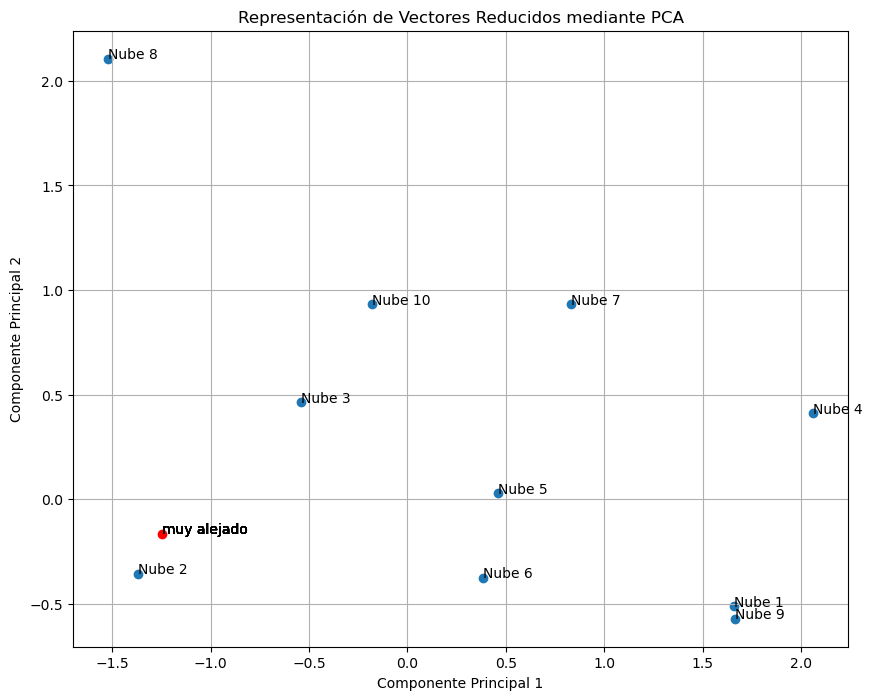

In [ ]:
import matplotlib.pyplot as plt

# Suponer que tenemos un arreglo de nombres para cada punto
names = np.array(["Nube {}".format(i+1) for i in range(10)])

# Crear una gráfica de los puntos reducidos
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:10, 0], X_reduced[:10, 1])
plt.scatter(X_reduced[3091, 0], X_reduced[3091, 1], color='red')

# Anotar cada punto con su nombre correspondiente
for i, name in enumerate(names):
    plt.annotate(name, (X_reduced[i, 0], X_reduced[i, 1]))
    plt.annotate("muy alejado", (X_reduced[3091, 0], X_reduced[3091,1]))

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Representación de Vectores Reducidos mediante PCA')
plt.grid(True)
plt.show()